<a href="https://colab.research.google.com/github/alqar8/alq_pp2/blob/main/Cat_Vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !unzip "drive/My Drive/CatVsDog/catvsdog.zip" -d "drive/My Drive/CatVsDog"

### Get our workspace ready

Import the necessary packages like tensorflow, tensorflow hub etc which will be very much handy and the basic needed requirement.

In [ ]:
# Import necessary tools

import tensorflow as tf
import tensorflow_hub as hub

# Check for the availability of GPU, if not make sure GPU is available
print("GPU:", "Yes  GPU Available" if tf.config.list_physical_devices("GPU") else "NO better turn on the GPU")

# Check the version of tensorflow, it must be 2.x
print(tf.__version__)

GPU: Yes  GPU Available
2.3.0


GPU will be very much handy here as it gives great advantage for faster computing of data.

In [ ]:
# Making use of more tools by importing them

import cv2 # for resizing images
import numpy as np
import os
from random import shuffle
from tqdm import tqdm # this is to get the progress bar for a particular process

cat_training_directory = "drive/My Drive/CatVsDog/training_set/training_set/cats"
dog_training_directory = "drive/My Drive/CatVsDog/training_set/training_set/dogs"



In [ ]:
len(cat_training_directory), len(dog_training_directory)

(54, 54)

In [ ]:
# Lets have a look at what are the items inside the cat_training_directory and dog_training_directory

cat_images_training = os.listdir(cat_training_directory)
dog_images_training = os.listdir(dog_training_directory)

In [ ]:
cat_images_training[:10], dog_images_training[:10]

(['cat.3512.jpg',
  'cat.537.jpg',
  'cat.3481.jpg',
  'cat.569.jpg',
  'cat.629.jpg',
  'cat.3559.jpg',
  'cat.527.jpg',
  'cat.3850.jpg',
  'cat.3617.jpg',
  'cat.3466.jpg'],
 ['dog.3684.jpg',
  'dog.396.jpg',
  'dog.3981.jpg',
  'dog.3504.jpg',
  'dog.3581.jpg',
  'dog.3993.jpg',
  'dog.3485.jpg',
  'dog.3681.jpg',
  'dog.3874.jpg',
  'dog.3707.jpg'])

In [ ]:
# Lets look at the length
len(cat_images_training), len(dog_images_training)

(4000, 4005)

So we now see that we are having 4000 images in the training set of cats and 4005 images in the training set of dogs.

Lets view 1 image from each set next.

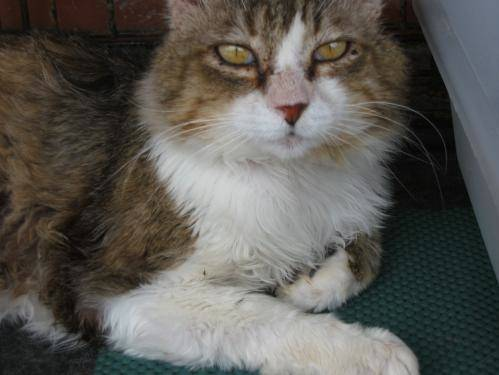

In [ ]:
# Lets look into an image from the dataset
from IPython.display import Image
Image(cat_training_directory + "/cat.3496.jpg")

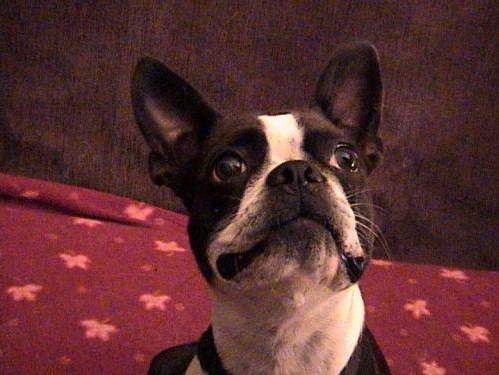

In [ ]:
Image(dog_training_directory + "/dog.393.jpg")

### Getting images and their labels.

Lets try to get images and their labels by first trying to get the filepathnames for cat and dog.

In [ ]:
def label_img(img):
    word_label = img.split('.')[-3]
    # conversion to one-hot array [cat,dog]
    #                            [much cat, no dog]
    if word_label == 'cat': return [1,0]
    #                             [no cat, very doggo]
    elif word_label == 'dog': return [0,1]

In [ ]:
cat_label = []
for image in tqdm(cat_images_training):
  label = label_img(image)
  cat_label.append(np.array(label))



dog_label = []
for image in tqdm(dog_images_training):
  label = label_img(image)
  dog_label.append(np.array(label))

cat_label[:10], dog_label[:10]

100%|██████████| 4005/4005 [00:00<00:00, 350590.38it/s]


([array([1, 0]),
  array([1, 0]),
  array([1, 0]),
  array([1, 0]),
  array([1, 0]),
  array([1, 0]),
  array([1, 0]),
  array([1, 0]),
  array([1, 0]),
  array([1, 0])],
 [array([0, 1]),
  array([0, 1]),
  array([0, 1]),
  array([0, 1]),
  array([0, 1]),
  array([0, 1]),
  array([0, 1]),
  array([0, 1]),
  array([0, 1]),
  array([0, 1])])

In [ ]:
len(cat_label), len(dog_label)

(4000, 4005)

In [ ]:
# Create a filepath for our cats
file_path_cat = ["drive/My Drive/CatVsDog/training_set/training_set/cats/" +fname  for fname in cat_images_training]
file_path_cat[:10]

['drive/My Drive/CatVsDog/training_set/training_set/cats/cat.3512.jpg',
 'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.537.jpg',
 'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.3481.jpg',
 'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.569.jpg',
 'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.629.jpg',
 'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.3559.jpg',
 'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.527.jpg',
 'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.3850.jpg',
 'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.3617.jpg',
 'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.3466.jpg']

In [ ]:
# Same way try to create the filepath for our dogs
file_path_dog = ["drive/My Drive/CatVsDog/training_set/training_set/dogs/" + fname for fname in dog_images_training]
file_path_dog[:2]

['drive/My Drive/CatVsDog/training_set/training_set/dogs/dog.3684.jpg',
 'drive/My Drive/CatVsDog/training_set/training_set/dogs/dog.396.jpg']

In [ ]:
# For our own purpose lets check whether the number of filepath of both cat and dogs is equal to the number of files in the cat and dog training directory
import os
# Check for cat
if len(cat_images_training) == len(file_path_cat):
  print("Hell yeah , you can proceed to victory")
else:
  print("Come on, we can check it again, its natural to check everything again")

Hell yeah , you can proceed to victory


In [ ]:
# Check the same for our dogs
if len(dog_images_training) == len(file_path_dog):
  print("Hell yeah , you can proceed to victory")
else:
  print("Come on, we can check it again, its natural to check everything again")

Hell yeah , you can proceed to victory


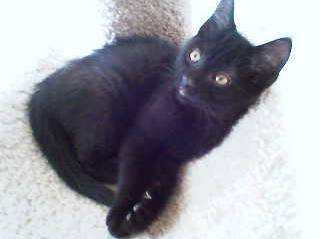

In [ ]:
Image(file_path_cat[100])

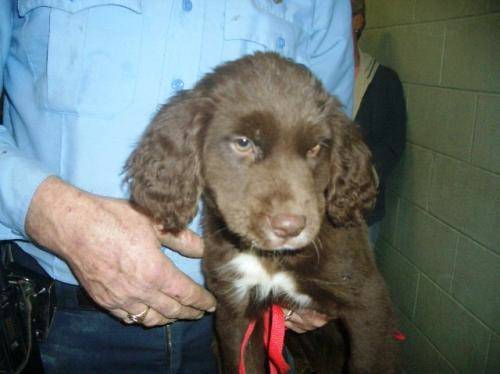

In [ ]:
Image(file_path_dog[100])

So after these steps, we got our training images as a list, so we can just take the next step to deal with the label

In [ ]:
# Lets do the same for dogs
import matplotlib.pyplot as plt

def show_images_dog(images):
  """
  We just plot say 25 images along with their labels
  """
  plt.figure(figsize=(10, 10))
  # We planned for 25 images, lets loop through 25 images
  for i in range(25):
    # Create subplots with 5 rows, 5 columns each
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title("dog")
    plt.axis("off")

In [ ]:
train_dog_images, train_dog_labels = next(train_dog_data.as_numpy_iterator())
train_dog_images[:4], train_dog_labels[:4]

(array([[[[0.82745105, 0.85098046, 0.85098046],
          [0.8291142 , 0.8526436 , 0.8526436 ],
          [0.83153015, 0.85505956, 0.85505956],
          ...,
          [0.18525942, 0.3096463 , 0.4589812 ],
          [0.17753865, 0.30754557, 0.45430684],
          [0.17254902, 0.30588236, 0.45098042]],
 
         [[0.7514356 , 0.774965  , 0.774965  ],
          [0.7530987 , 0.7766282 , 0.7766282 ],
          [0.7555147 , 0.77904415, 0.77904415],
          ...,
          [0.17941208, 0.3041515 , 0.45336884],
          [0.17000762, 0.30338192, 0.4484595 ],
          [0.16377802, 0.3029587 , 0.4451331 ]],
 
         [[0.7480743 , 0.7716037 , 0.7716037 ],
          [0.74877965, 0.77230906, 0.77230906],
          [0.74980426, 0.77333367, 0.77333367],
          ...,
          [0.18816368, 0.3173587 , 0.46003303],
          [0.17742859, 0.31776962, 0.45549732],
          [0.16981792, 0.31776962, 0.4521709 ]],
 
         ...,
 
         [[0.54236704, 0.5462886 , 0.5227592 ],
          [0.53611

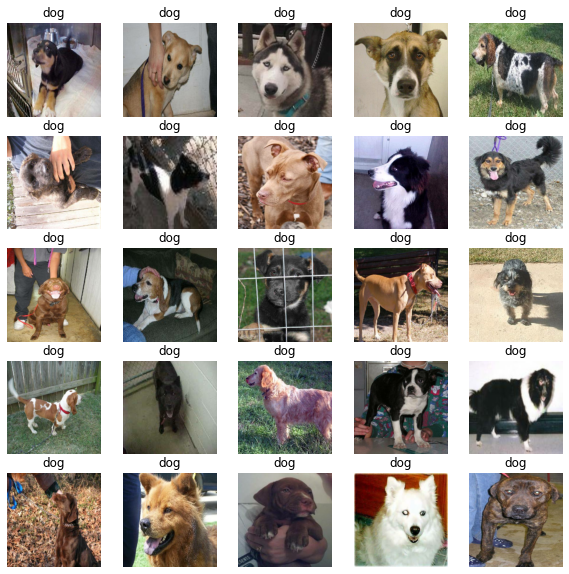

In [ ]:
train_dog_images, train_dog_labels = next(train_dog_data.as_numpy_iterator())
show_images_dog(train_dog_images)


Now we have visualized our trainind data, we have also generated the validation data, so lets visualize the validation data of both cat and dog

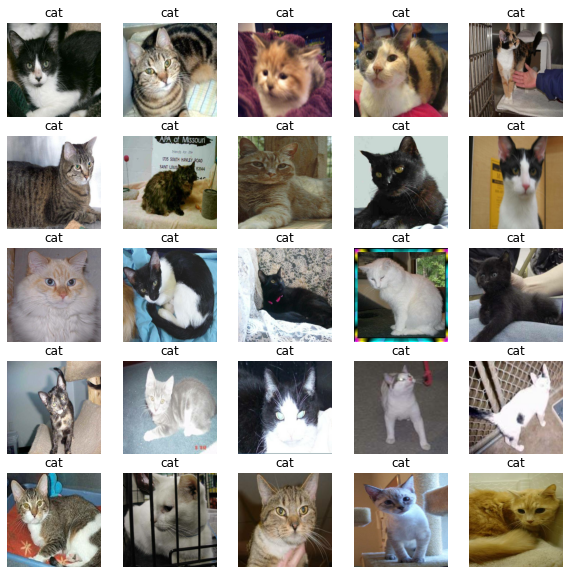

In [ ]:
# Start with cat
val_cat_images, val_cat_labels = next(val_cat_data.as_numpy_iterator())
show_images_cat(val_cat_images)

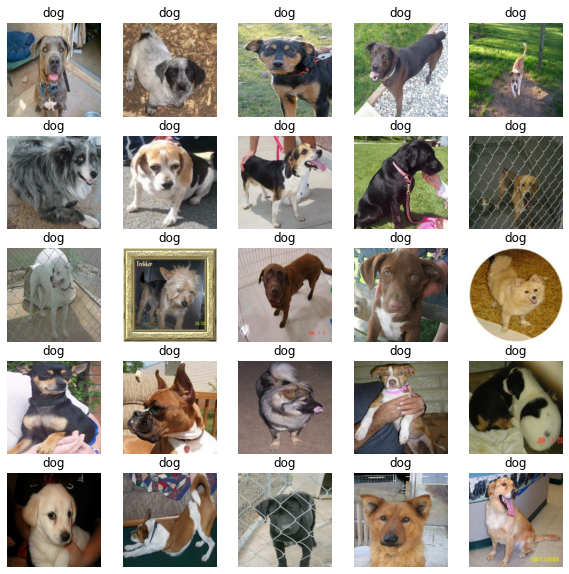

In [ ]:
# Next for dog
val_dog_images, val_dog_labels = next(val_dog_data.as_numpy_iterator())
show_images_dog(val_dog_images)

So now have visualized for the validation data of both cat and dog

In [ ]:
# Create a function to unbatch a batch dataset
# 1. Cat
def unbatchify_cat(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays of images and labels.
  """

  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(cat_label[np.argmax(label)])

  return images, labels

# Unbatchify the validation data
val_cat_images, val_cat_labels = unbatchify_cat(val_cat_data)
val_cat_images[0], val_cat_labels[0]

(array([[[0.10451682, 0.12804623, 0.12020309],
         [0.13862045, 0.16214986, 0.15430672],
         [0.16455504, 0.18808447, 0.18024133],
         ...,
         [0.53478247, 0.48772362, 0.43282166],
         [0.54345834, 0.4963995 , 0.44149753],
         [0.5571517 , 0.51009285, 0.45519093]],
 
        [[0.12427925, 0.14780867, 0.13996553],
         [0.15668769, 0.1802171 , 0.17237397],
         [0.18173145, 0.20526087, 0.19741774],
         ...,
         [0.5462417 , 0.49918288, 0.44428092],
         [0.56959057, 0.52253175, 0.46762976],
         [0.5721085 , 0.5250497 , 0.47014773]],
 
        [[0.12887985, 0.15240926, 0.14456612],
         [0.15874475, 0.18227418, 0.17443103],
         [0.18138131, 0.20491073, 0.19706759],
         ...,
         [0.560871  , 0.5138122 , 0.45891023],
         [0.58964217, 0.54258335, 0.48768133],
         [0.5811905 , 0.5341317 , 0.47922978]],
 
        ...,
 
        [[0.12800953, 0.10055853, 0.06134285],
         [0.1094428 , 0.09781286, 0.05316

Now we have unbatchified oru cat validation data, lets make use the same function for the dog validation data also.

In [ ]:
# Create a function to unbatch a batch dataset
# 1. Dog
def unbatchify_dog(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays of images and labels.
  """

  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(dog_label[np.argmax(label)])

  return images, labels

# Unbatchify the validation data
val_dog_images, val_dog_labels = unbatchify_dog(val_dog_data)
val_dog_images[0], val_dog_labels[0]

(array([[[0.43415868, 0.43808025, 0.41455084],
         [0.44078135, 0.44470292, 0.4211735 ],
         [0.43020585, 0.43412742, 0.410598  ],
         ...,
         [0.        , 0.00784314, 0.00392157],
         [0.        , 0.00392157, 0.01176471],
         [0.        , 0.00392157, 0.01176471]],
 
        [[0.41569507, 0.41961664, 0.39608723],
         [0.43465763, 0.4385792 , 0.4150498 ],
         [0.4413716 , 0.44529316, 0.42176375],
         ...,
         [0.        , 0.00784314, 0.00392157],
         [0.        , 0.00392157, 0.01176471],
         [0.        , 0.00392157, 0.01176471]],
 
        [[0.4233131 , 0.42723468, 0.40370527],
         [0.43672848, 0.44065005, 0.41712064],
         [0.43524912, 0.4391707 , 0.41564128],
         ...,
         [0.        , 0.00983018, 0.00193452],
         [0.        , 0.00590861, 0.00779062],
         [0.        , 0.00590861, 0.00779062]],
 
        ...,
 
        [[0.574976  , 0.5632113 , 0.49654466],
         [0.5746395 , 0.5628748 , 0.49620

Lets check back our `get_pred_label_cat()` and `get_pred_label_dog()`

In [ ]:
get_pred_label_cat(val_cat_labels[0]), get_pred_label_dog(val_dog_labels[0])

(array([1, 0]), array([0, 1]))

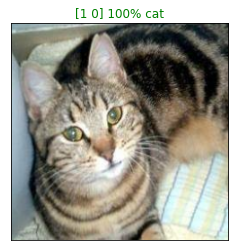

In [ ]:
plot_pred_cat(prediction_probabilities = predictions_cat,
          labels=val_cat_labels,
          images=val_cat_images)

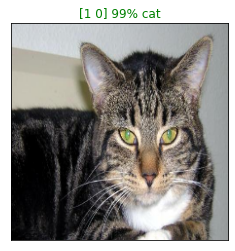

In [ ]:
plot_pred_cat(prediction_probabilities = predictions_cat,
          labels=val_cat_labels,
          images=val_cat_images,
          n=99)

In [ ]:
def plot_pred_dog(prediction_probabilities, labels, images, n=1):
  """
  View the truth, prediction and images for n samples of dog.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  pred_label = get_pred_label_dog(pred_prob)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if (pred_label == true_label).any():
    color="green"
  else:
    color = "red"

  # Chnage plot title to be predicited, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    "dog"), color=color)

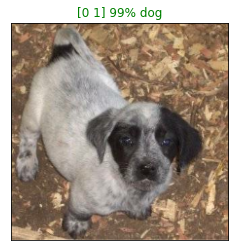

In [ ]:
plot_pred_dog(prediction_probabilities = predictions_dog,
          labels=val_dog_labels,
          images=val_dog_images)

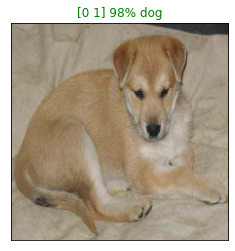

In [ ]:
plot_pred_dog(prediction_probabilities = predictions_dog,
          labels=val_dog_labels,
          images=val_dog_images,
          n=111)

In [ ]:
len(X_cat), len(y_cat), len(X_dog), len(y_dog)

(4000, 4000, 4005, 4005)

In [ ]:
# Now we create a data batch with the full data in our hand
full_data_cat = create_data_batches(X_cat, y_cat)
full_data_dog = create_data_batches(X_dog, y_dog)

creating training data batches....
creating training data batches....


In [ ]:
full_data_cat, full_data_dog

(<BatchDataset shapes: ((None, 224, 224, 3), (None, 2)), types: (tf.float32, tf.int64)>,
 <BatchDataset shapes: ((None, 224, 224, 3), (None, 2)), types: (tf.float32, tf.int64)>)

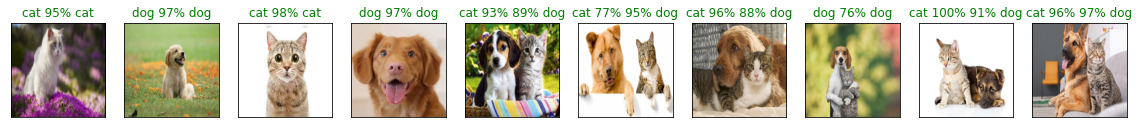

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
for i, image in enumerate(custom_images):
  plt.subplot(1, custom_image_path_length, i+1)
  plt.xticks([])
  plt.yticks([])
  if np.max(custom_prediction_1[i]) > 0.75 and np.max(custom_prediction_2[i]) > 0.75:
    plt.title("{} {:2.0f}% {:2.0f}% {}".format("cat",
                                      np.max(custom_prediction_1[i])*100,
                                      np.max(custom_prediction_2[i])*100,
                                      "dog"), color="green")
  elif np.max(custom_prediction_1[i]) > np.max(custom_prediction_2[i]):
    plt.title("{} {:2.0f}% {}".format("cat",
                                      np.max(custom_prediction_1[i])*100,
                                      "cat"), color="green")
  else:
    plt.title("{} {:2.0f}% {}".format("dog",
                                      np.max(custom_prediction_2[i])*100,
                                      "dog"), color="green")
  plt.imshow(image)